In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df =pd.read_csv('/content/cleaned_data.csv')
df.head(5)

,invoice_id,branch,city,category,unit_price,quantity,date,payment_method,rating,profit_margin,total_price,hour
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,Ewallet,9.1,0.48,522.83,13
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,Cash,9.6,0.48,76.40,10
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,Credit card,7.4,0.33,324.31,13
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,Ewallet,8.4,0.33,465.76,20
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,Ewallet,5.3,0.48,604.17,10


In [6]:
df.dtypes

,0
invoice_id,int64
branch,object
city,object
category,object
unit_price,float64
quantity,float64
date,object
payment_method,object
rating,float64
profit_margin,float64


In [7]:
# First, let's print the current dtypes
print("Original dtypes:")
print(df.dtypes)
print("\n")

# Function to check if a column might contain dates
def is_date_column(column_name):
    date_indicators = ['date', 'datetime', 'time', 'year', 'month', 'day']
    return any(indicator in column_name.lower() for indicator in date_indicators)

# Convert date columns with explicit format
for col in df.columns:
    if df[col].dtype == 'object':
        # Check if column name suggests it might contain dates
        if is_date_column(col):
            try:
                # First attempt: Try common date format
                df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')
            except ValueError:
                try:
                    # Second attempt: Try another common format
                    df[col] = pd.to_datetime(df[col], format='%d-%m-%Y')
                except ValueError:
                    try:
                        # Last attempt: Let pandas infer the format
                        df[col] = pd.to_datetime(df[col])
                        print(f"Column '{col}' converted to datetime using inferred format")
                    except ValueError:
                        print(f"Warning: Could not convert column '{col}' to datetime")

# Print the updated dtypes
print("\nUpdated dtypes:")
print(df.dtypes)

# Optional: Display a sample of the date columns to verify conversion
date_columns = df.select_dtypes(include=['datetime64[ns]']).columns
if len(date_columns) > 0:
    print("\nSample of date columns:")
    print(df[date_columns].head())

Original dtypes:
invoice_id          int64
branch             object
city               object
category           object
unit_price        float64
quantity          float64
date               object
payment_method     object
rating            float64
profit_margin     float64
total_price       float64
hour                int64
dtype: object



Updated dtypes:
invoice_id                 int64
branch                    object
city                      object
category                  object
unit_price               float64
quantity                 float64
date              datetime64[ns]
payment_method            object
rating                   float64
profit_margin            float64
total_price              float64
hour                       int64
dtype: object

Sample of date columns:
        date
0 2019-01-05
1 2019-03-08
2 2019-03-03
3 2019-01-27
4 2019-02-08


In [11]:
# prompt: find out unique column in rating

# Assuming 'rating' is a column in your DataFrame 'df'
unique_ratings = df['rating'].unique()
unique_ratings

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9,  3. ])

**Rating impact on total sales**

<ipython-input-12-e7a8e4c545d5>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_rating_category = df.groupby('rating_category')['total_price'].sum()
<ipython-input-12-e7a8e4c545d5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_rating_category.index, y=sales_by_rating_category.values, palette="viridis")


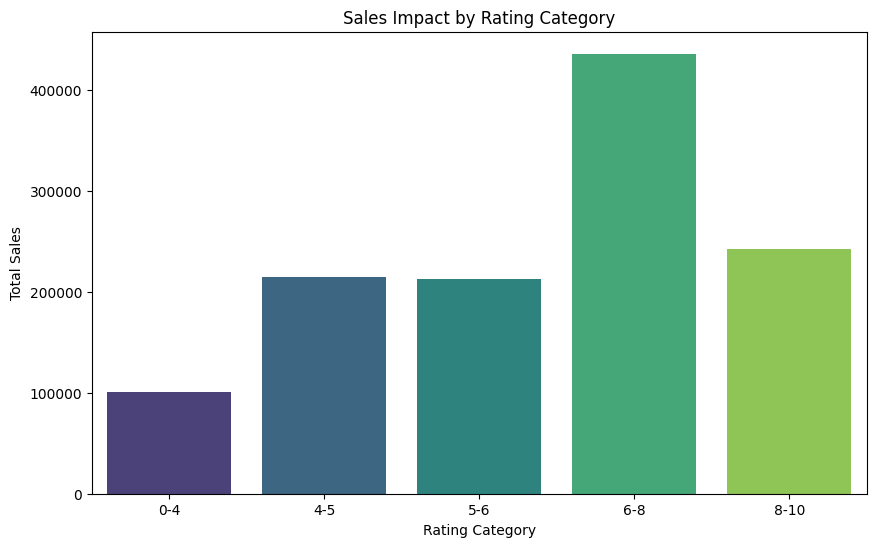

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the rating ranges (5 groups)
rating_bins = [0, 4, 5, 6, 8, 10]
rating_labels = ['0-4', '4-5', '5-6', '6-8', '8-10']

# Create a new column in the dataframe that assigns the appropriate category based on rating
df['rating_category'] = pd.cut(df['rating'], bins=rating_bins, labels=rating_labels, right=False)

# Group by rating category and calculate total sales for each category
sales_by_rating_category = df.groupby('rating_category')['total_price'].sum()

# Plotting the sales impact by rating category
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_rating_category.index, y=sales_by_rating_category.values, palette="viridis")
plt.title('Sales Impact by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


<ipython-input-20-80c7ab1c9e5a>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_by_rating = df.groupby(['rating_category', 'category']).size().reset_index(name='count')


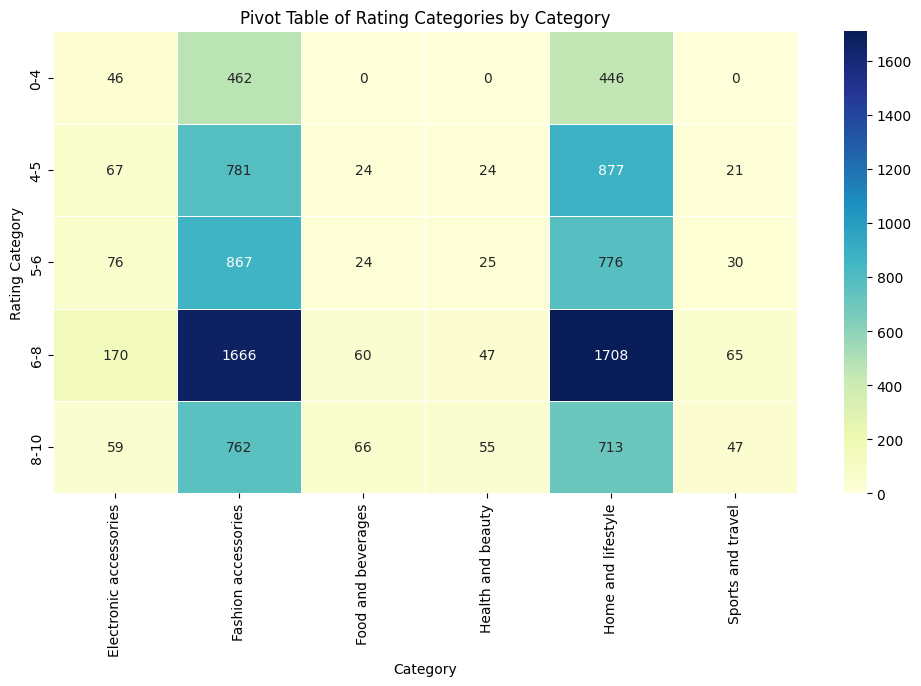

In [20]:

# Define the new rating bins and labels
rating_bins = [0, 4, 5, 6, 8, 10]  # Define rating ranges
rating_labels = ['0-4', '4-5', '5-6', '6-8', '8-10']  # Define the corresponding labels

# Create a new column for the rating categories
df['rating_category'] = pd.cut(df['rating'], bins=rating_bins, labels=rating_labels, right=False)

# Now, group by rating_category and category, and count the occurrences
category_by_rating = df.groupby(['rating_category', 'category']).size().reset_index(name='count')


# Optionally, pivot the table for a clearer view
pivot_table = category_by_rating.pivot(index='rating_category', columns='category', values='count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Pivot Table of Rating Categories by Category')
plt.xlabel('Category')
plt.ylabel('Rating Category')
plt.show()



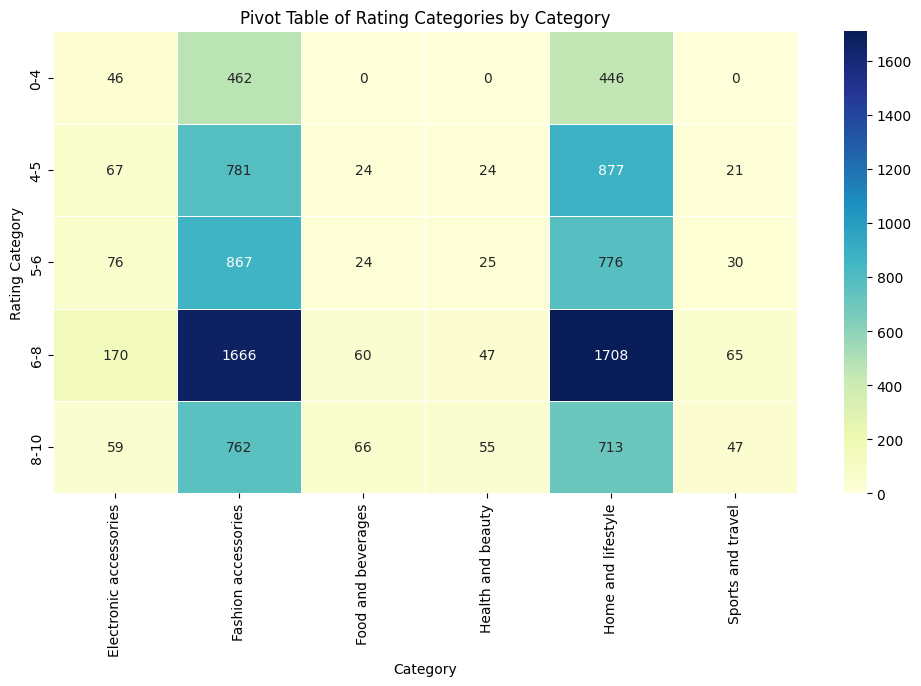

**Profit Margin by Category**

<ipython-input-21-cc473c6c3389>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='profit_margin', data=df, ci=None, palette='coolwarm')
<ipython-input-21-cc473c6c3389>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='profit_margin', data=df, ci=None, palette='coolwarm')


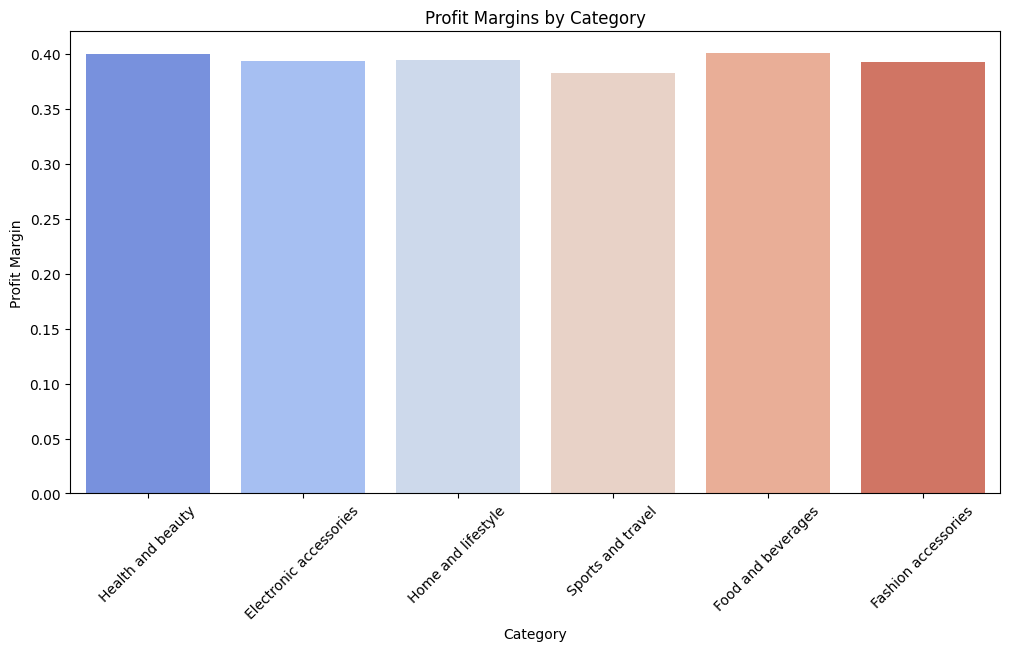

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='profit_margin', data=df, ci=None, palette='coolwarm')
plt.title("Profit Margins by Category")
plt.xlabel("Category")
plt.ylabel("Profit Margin")
plt.xticks(rotation=45)
plt.show()

**2. Payment Method Preferences**

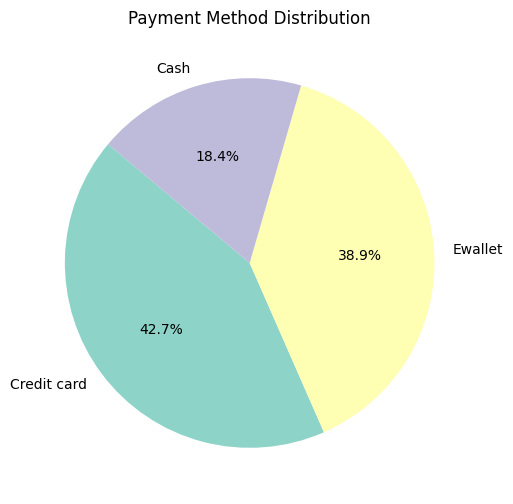

In [22]:
plt.figure(figsize=(8, 6))
payment_counts = df['payment_method'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

**Branch-wise Performance (Total Sales by Branch)**

<ipython-input-24-3dee7532bcc3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='branch', y='total_price', data=top_10_branches, palette='Blues_d')


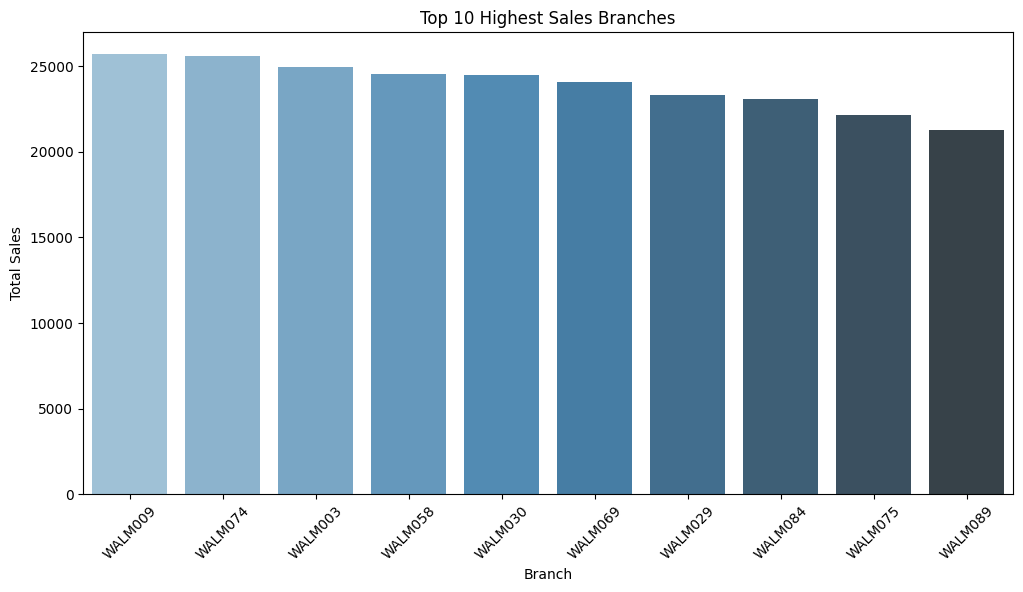

<ipython-input-24-3dee7532bcc3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='branch', y='total_price', data=lowest_10_branches, palette='Reds_d')


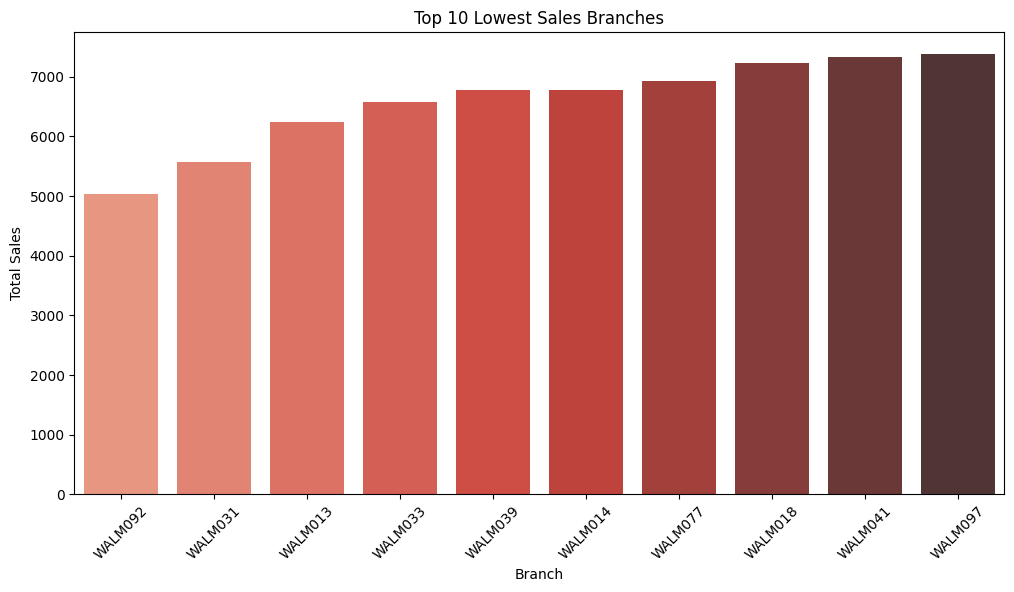

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'branch' and calculate total sales
branch_sales = df.groupby('branch')['total_price'].sum().reset_index()

# Step 2: Sort branches by total sales (descending for highest, ascending for lowest)
top_10_branches = branch_sales.sort_values(by='total_price', ascending=False).head(10)
lowest_10_branches = branch_sales.sort_values(by='total_price', ascending=True).head(10)

# Step 3: Plot top 10 branches
plt.figure(figsize=(12, 6))
sns.barplot(x='branch', y='total_price', data=top_10_branches, palette='Blues_d')
plt.title("Top 10 Highest Sales Branches")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Step 4: Plot lowest 10 branches
plt.figure(figsize=(12, 6))
sns.barplot(x='branch', y='total_price', data=lowest_10_branches, palette='Reds_d')
plt.title("Top 10 Lowest Sales Branches")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


**Time of Day Sales Trends (Hourly Sales)**

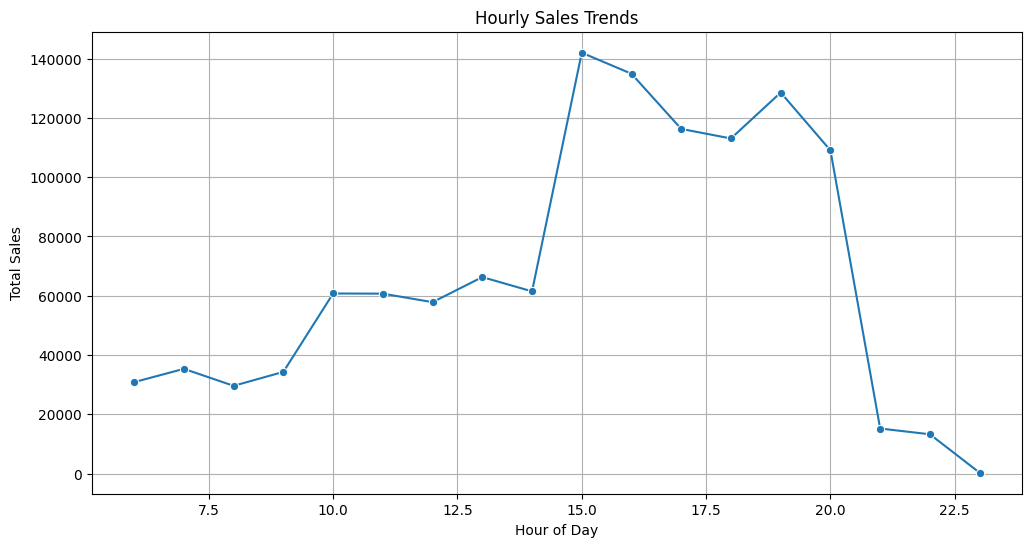

In [26]:
hourly_sales = df.groupby('hour')['total_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='total_price', data=hourly_sales, marker="o")
plt.title("Hourly Sales Trends")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


In [27]:
from scipy.stats import ttest_ind

# Extract ratings based on payment method
ewallet_ratings = df[df['payment_method'] == 'Ewallet']['rating']
cash_ratings = df[df['payment_method'] == 'Cash']['rating']

# Perform t-test
t_stat, p_value = ttest_ind(ewallet_ratings, cash_ratings)

print("\nHypothesis Testing: Payment Method vs Ratings")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Payment method significantly affects ratings.")
else:
    print("Fail to reject the null hypothesis: Payment method does not significantly affect ratings.")



Hypothesis Testing: Payment Method vs Ratings
T-statistic: 21.96, P-value: 0.0000
Reject the null hypothesis: Payment method significantly affects ratings.


<ipython-input-28-0dcf5cda4fb9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_method', y='rating', data=df, palette='Set2')


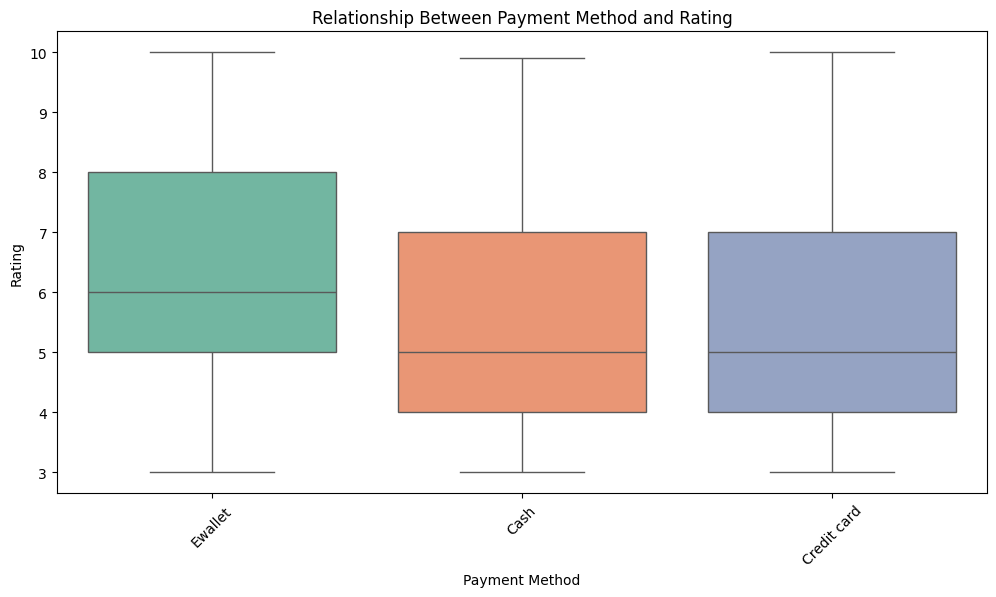

In [28]:
# Plotting the relationship between Payment Method and Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='payment_method', y='rating', data=df, palette='Set2')
plt.title('Relationship Between Payment Method and Rating')
plt.xlabel('Payment Method')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


**Principal Component Analysis (PCA)**

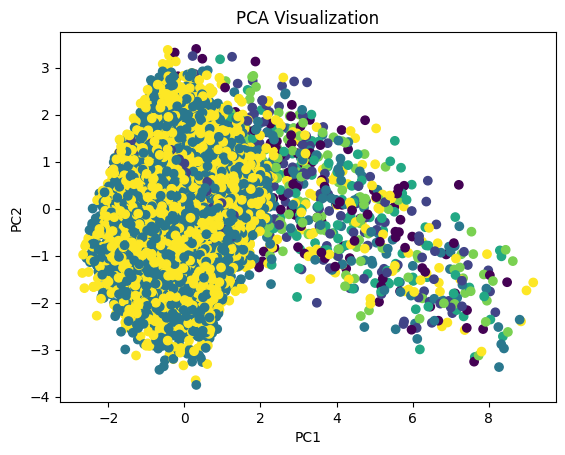

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numerical_data = df.select_dtypes(include=['float64', 'int64']).dropna()
scaled_data = StandardScaler().fit_transform(numerical_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['category'].factorize()[0], cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


**Chi-Square Test (Categorical vs Categorical)**

In [30]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['payment_method'], df['category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p}")


Chi2 Statistic: 176.49205317436696, P-value: 1.2523159166349295e-32


**ANOVA (Categorical vs Numerical)**

In [32]:
from scipy.stats import f_oneway

groups = [df[df['category'] == cat]['profit_margin'] for cat in df['category'].unique()]
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA Results - F-statistic: {f_stat}, P-value: {p_value}")


ANOVA Results - F-statistic: 1.0335213849631937, P-value: 0.3958360057848964


**Use the Variance Inflation Factor (VIF)**

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.select_dtypes(include=['float64', 'int64']).dropna()
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


         feature        VIF
0     invoice_id   3.940674
1     unit_price  15.236738
2       quantity  14.646669
3         rating  10.988236
4  profit_margin  15.260245
5    total_price  14.803241
6           hour  12.192766
